# Обучение без учителя в Scikit-learn

## Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:

n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
y = pd.DataFrame(boston['target'], columns=['price'])
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaller = StandardScaler()

In [13]:
train_scaller = pd.DataFrame(scaller.fit_transform(X_train), columns=X_train.columns)
test_scaled = pd.DataFrame(scaller.transform(X_test), columns=X_test.columns)

In [14]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
train_tsne = tsne.fit_transform(train_scaller)

print('До:\t{}'.format(train_scaller.shape))
print('После:\t{}'.format(train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


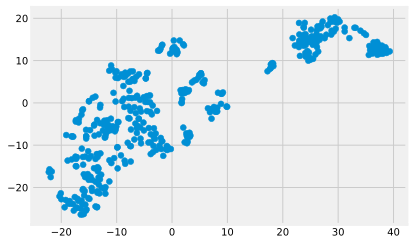

In [15]:
plt.scatter(train_tsne[:, 0], train_tsne[:, 1])
plt.show()

## Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


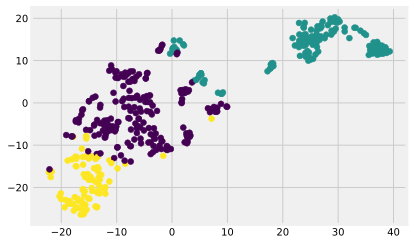

In [17]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=42, max_iter=100)

labels_train = model.fit_predict(train_scaller)
plt.scatter(train_tsne[:, 0], train_tsne[:, 1], c=labels_train)

plt.show()

In [19]:
print('Первый кластер: ', y_train[labels_train == 0].mean())
print('Второй кластер:', y_train[labels_train == 1].mean())
print('Третий кластер:', y_train[labels_train == 2].mean())

Первый кластер:  price    24.958115
dtype: float64
Второй кластер: price    16.165354
dtype: float64
Третий кластер: price    27.788372
dtype: float64


In [20]:
print('Первый кластер: ', X_train['CRIM'][labels_train == 0].mean())
print('Второй кластер:', X_train['CRIM'][labels_train == 1].mean())
print('Третий кластер:', X_train['CRIM'][labels_train == 2].mean())

Первый кластер:  0.42166020942408367
Второй кластер: 10.797028425196853
Третий кластер: 0.07356558139534886


## *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [25]:
scaller = StandardScaler()

train_scaller = pd.DataFrame(scaller.fit_transform(X_train), columns=X_train.columns)
test_scalled = pd.DataFrame(scaller.transform(X_test), columns=X_test.columns)

In [26]:
X_test_tsne = tsne.fit_transform(test_scalled)

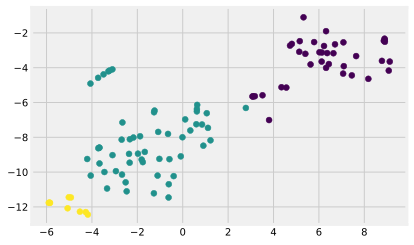

In [27]:
labels_test = model.fit_predict(test_scalled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

In [28]:
print('Первый кластер: ', X_test['CRIM'][labels_test == 0].mean())
print('Второй кластер:', X_test['CRIM'][labels_test== 1].mean())
print('Третий кластер:', X_test['CRIM'][labels_test== 2].mean())

Первый кластер:  9.419181842105264
Второй кластер: 0.21929690909090907
Третий кластер: 0.04070333333333334
